# **ROOM OCCUPANCY DETECTION**

## Group Number: 52

### Dinojan V.             EG/2021/4487
### Jackshan Venujan G.S   EG/2021/4566

## Introduction

Room occupancy detection plays a key role in smart building systems, enabling energy efficiency and resource optimization. This project uses Logistic Regression and Decision Trees to classify room occupancy based on environmental data such as temperature, humidity, light, and CO2 levels. The models are evaluated using metrics like accuracy, precision, recall, and F1-score to identify the most effective approach for this task.

## Literature Survey
Room occupancy detection using environmental data is a key application of supervised learning.

Logistic Regression: Known for its simplicity and interpretability, Logistic Regression performs well for binary classification when relationships between features and the target are linear.

Decision Trees: These are versatile models capable of capturing nonlinear relationships, commonly used in occupancy detection due to their ability to handle diverse data types.

Evaluation Metrics: Metrics such as accuracy, precision, recall, and F1-score are critical to assessing model performance, especially for imbalanced datasets.

Applications: Accurate occupancy classification supports energy-efficient systems in smart buildings, optimizing lighting, HVAC control, and resource management.

This project utilizes Logistic Regression and Decision Trees, leveraging their strengths to classify room occupancy and compare their performance.

## Dataset Description

binary classification (room occupancy) from Temperature,Humidity,Light and CO2.
occupancy was obtained from time stamped pictures that were taken every minute.

source

Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models. Luis M. Candanedo, Véronique Feldheim. Energy and Buildings. Volume 112, 15 January 2016, Pages 28-39.
https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor

# *** 1.0 Exploratory Data Analysis (EDA)***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Data Loading

In [2]:
file_path = '/content/drive/MyDrive/MLproject_room_occupancy/Occupancy.csv'

## 1.2 Load the Necessary Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


Printing data by columns to understanďthe data

In [4]:
df = pd.read_csv(file_path)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


only date is categorical data.
we will drop that because of not contributing for room occupancy

In [6]:
df.shape

(20560, 7)

## 1.3 Data Visualization

In the following section we are going to do some visualization in the dataset.

**Q:**
Visualizing the distribution of numerical features (histograms) helps identify patterns like skewness, multimodality, or uniformity. Understanding these distributions informs preprocessing steps, such as scaling or transformations, that should be applied consistently to both training and test sets.

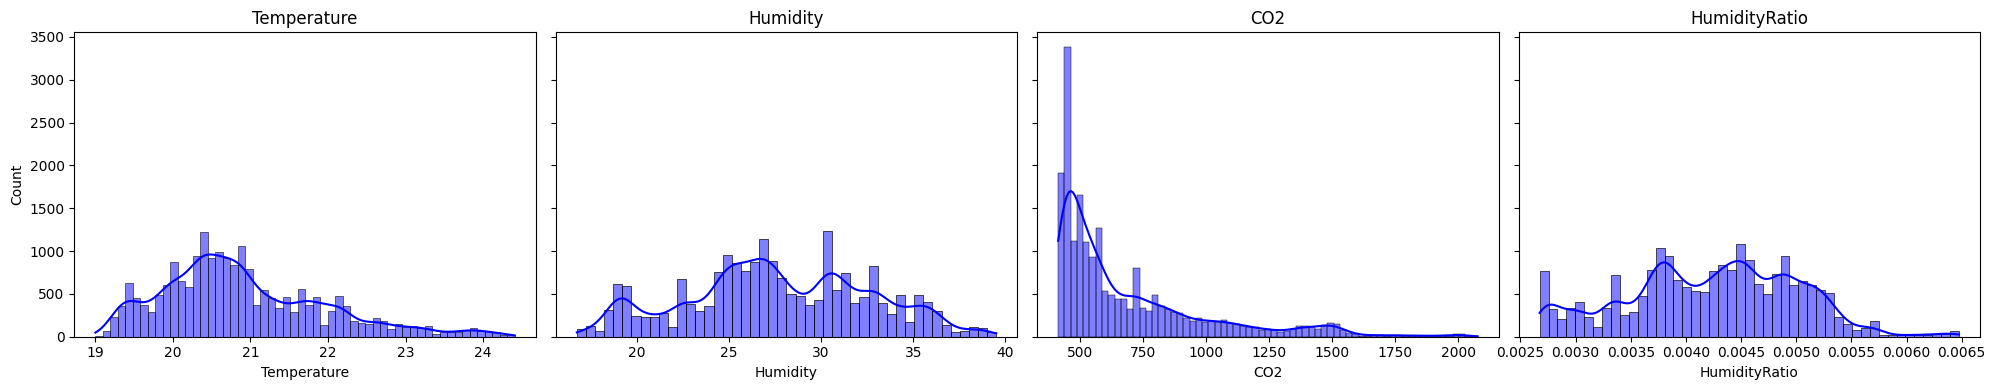

In [7]:
features = ['Temperature', 'Humidity',  'CO2', 'HumidityRatio']
fig, axes = plt.subplots(1, len(features), figsize=(20, 4), sharey=True)

# Plot histograms for each feature
for ax, feature in zip(axes, features):
    sns.histplot(df[feature], kde=True, ax=ax, color='blue')
    ax.set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

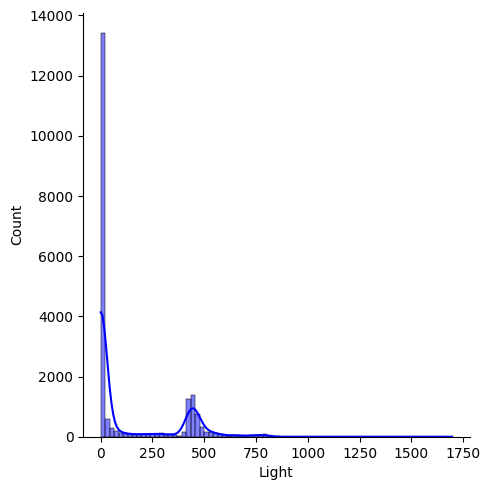

In [8]:
sns.displot(df['Light'],kde = True, color='blue')

## 1.4 Descriptive Statistics

In [9]:
df2 = df.copy()

**Getting Descriptive Statistics after dividing 'Occupied' = 1 , 'Occupied' = 0 classes**

In [10]:
occupied = df2[df2['Occupancy'] == 1]
not_occupied = df2[df2['Occupancy'] == 0]

# Descriptive statistics for each class
print("Descriptive statistics for occupied:")
print(occupied.describe())

print("\nDescriptive statistics for not occupied:")
print(not_occupied.describe())

Descriptive statistics for occupied:
       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  4750.000000  4750.000000  4750.000000  4750.000000    4750.000000   
mean     21.975909    28.076209   481.967380   975.321870       0.004589   
std       0.817660     4.472351    94.704345   317.261466       0.000748   
min      19.500000    18.600000     0.000000   439.000000       0.002715   
25%      21.500000    25.200000   433.000000   763.466667       0.004217   
50%      21.890000    27.882000   454.000000   928.583333       0.004603   
75%      22.340000    31.178750   481.575000  1120.500000       0.005049   
max      24.408333    39.117500  1697.250000  2028.500000       0.006476   

       Occupancy  
count     4750.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0  

Descriptive statistics for not occupied:
        Temperature      Humidity         Light           CO2  Hu

In [11]:
# df2 - Dataframe afterr removing data feature
df2 = df2.drop(columns=['date'])

## **2.0  Data Preprocessing**

##  2.1  Handling Null Values

In [12]:
df.isnull().values.any()

False

There is no null values in the dataset

## 2.2 Checking for Imbalance in Data




In [13]:
df.shape

(20560, 7)

In [14]:
occupied = df[df['Occupancy']== 1]
not_occupied = df[df['Occupancy'] == 0]

In [15]:
# Getting the count of occupied and not_occupied details
print(occupied.shape, not_occupied.shape)

(4750, 7) (15810, 7)


In [16]:
class_distribution = df['Occupancy'].value_counts(normalize=True)
print(class_distribution)

Occupancy
0    0.768969
1    0.231031
Name: proportion, dtype: float64


**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. Imbalanced datasets can lead to biased model performance.
2. Models trained on imbalanced data may struggle to generalize well to new, unseen data, particularly for the minority class.
3. Evaluation metrics such as accuracy may be misleading on imbalanced datasets, as they can be high due to the dominance of the majority class.

**Identified it is an Imbalanced dataset**


### **Q :** will descriptive data analysis cause the data leakage ?
**A :**
Key Points on Data Leakage:
Data leakage happens when information from the test set unintentionally influences the training process. Examples of leakage include:

Scaling or normalizing the dataset using statistics (like mean or standard deviation) computed from both train and test sets.
Imputing missing values using metrics derived from the whole dataset (e.g., the mean of the full dataset instead of the training set).
Feature engineering that uses information from the test set (e.g., creating a feature that directly or indirectly depends on the target values in the test set).

## 2.3  Treating Outliers

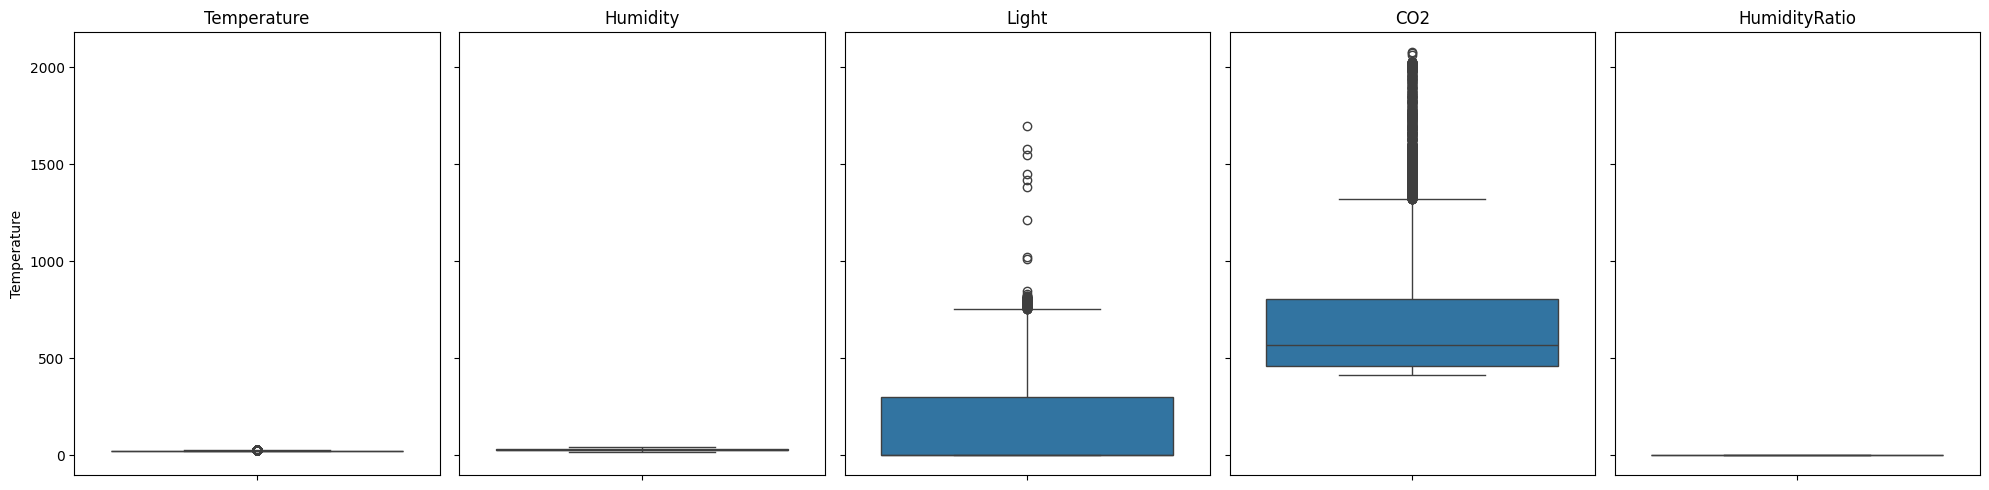

In [17]:

features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
fig, axes = plt.subplots(1, len(features), figsize=(20, 5), sharey=True)
for i, feature in enumerate(features):
    sns.boxplot(df2[feature], ax=axes[i])
    axes[i].set_title(f"{feature}")

# Adjust layout
plt.tight_layout()
plt.show()

### Treating outliers by classes occupied and not occupied

Best to treat outliers separately for each class (like "occupied" and "not occupied").

Why Treat Outliers Separately?
Different Distributions for Each Class:

The data distribution for "occupied" may differ significantly from "not occupied."
Outliers in one class might be typical values in another. For instance, higher temperatures or CO2 levels might be expected in an "occupied" room but appear as outliers for "not occupied."
Preserving Class-specific Patterns:

Treating outliers separately ensures that you do not inadvertently remove important class-specific data patterns.
Better Model Performance:

Models can capture nuances in the data more effectively if you address anomalies based on the behavior of each class.

**Selecting Proper technique to remove outliers**
Hence according to the data visualization we found that data distribution is not symmetric or bell shaped. So we will use Interquatile range method to remove outliers.

** VISUALIZATION OF  TEMPERATURE FEATURE BEFORE REMOVING & AFTER REMOVING OUTLIERS**

In [18]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Calculate Q1, Q3, and IQR
Q1 = df2['Temperature'].quantile(0.25)
Q3 = df2['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds
lower_bound_1_5 = Q1 - 1.5 * IQR
upper_bound_1_5 = Q3 + 1.5 * IQR
lower_bound_3 = Q1 - 3 * IQR
upper_bound_3 = Q3 + 3 * IQR

# df_without_outliers - dataframe after removing outliers
df_without_outliers = df2[(df2['Temperature'] >= lower_bound_1_5) & (df['Temperature'] <= upper_bound_1_5)]

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Before Removing Outliers", "After Removing Outliers"),
    shared_yaxes=True
)

# Boxplot before removing outliers
fig.add_trace(
    go.Box(
        x=df2['Occupancy'],
        y=df2['Temperature'],
        name="Before",
        boxmean=True  # Show mean line
    ),
    row=1, col=1
)

# Boxplot after removing outliers
fig.add_trace(
    go.Box(
        x=df_without_outliers['Occupancy'],
        y=df_without_outliers['Temperature'],
        name="After",
        boxmean=True  # Show mean line
    ),
    row=1, col=2
)

# Add 1.5 IQR and 3 IQR thresholds as reference lines
thresholds = [
    {"name": "1.5 IQR", "color": "blue", "dash": "dash", "value": [lower_bound_1_5, upper_bound_1_5]},
    {"name": "3 IQR", "color": "red", "dash": "dot", "value": [lower_bound_3, upper_bound_3]},
]

for threshold in thresholds:
    for bound in threshold["value"]:
        # Add threshold to both subplots
        fig.add_shape(
            type="line",
            xref="paper", yref="y",
            x0=0, x1=0.5, y0=bound, y1=bound,
            line=dict(color=threshold["color"], dash=threshold["dash"]),
        )
        fig.add_shape(
            type="line",
            xref="paper", yref="y",
            x0=0.5, x1=1, y0=bound, y1=bound,
            line=dict(color=threshold["color"], dash=threshold["dash"]),
        )

# Update layout
fig.update_layout(
    title="Comparison of Boxplots Before and After Removing Outliers",
    xaxis_title="Occupancy (Before)",
    xaxis2_title="Occupancy (After)",
    yaxis_title="Temperature",
    height=600, width=1000,
    showlegend=False,
)

# Show the plot
fig.show()


In [19]:
# Assuming dataframe d2 is already defined
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

Q1 = df2[features].quantile(0.25)
Q3 = df2[features].quantile(0.75)
IQR = Q3 - Q1

# df3 - Dataframe without outliers
df3 = df2[~((df2[features] < (Q1 - 1.5 * IQR)) | (df2[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of data points before removing outliers: ",len(df2))
print("Number of data points after removing outliers: ",len(df3))

Number of data points before removing outliers:  20560
Number of data points after removing outliers:  18538


## 2.4 Correlation Analysis

**CORRELATION ANALYSIS BEFORE BALANCING & SPLITTING THE DATA**

Pearson Correlation Matrix:
               Temperature  Humidity     Light       CO2  HumidityRatio  \
Temperature       1.000000 -0.215267  0.666112  0.548851       0.114048   
Humidity         -0.215267  1.000000 -0.078263  0.170164       0.944308   
Light             0.666112 -0.078263  1.000000  0.600172       0.144032   
CO2               0.548851  0.170164  0.600172  1.000000       0.366403   
HumidityRatio     0.114048  0.944308  0.144032  0.366403       1.000000   
Occupancy         0.559946 -0.029037  0.925343  0.621332       0.163628   

               Occupancy  
Temperature     0.559946  
Humidity       -0.029037  
Light           0.925343  
CO2             0.621332  
HumidityRatio   0.163628  
Occupancy       1.000000  


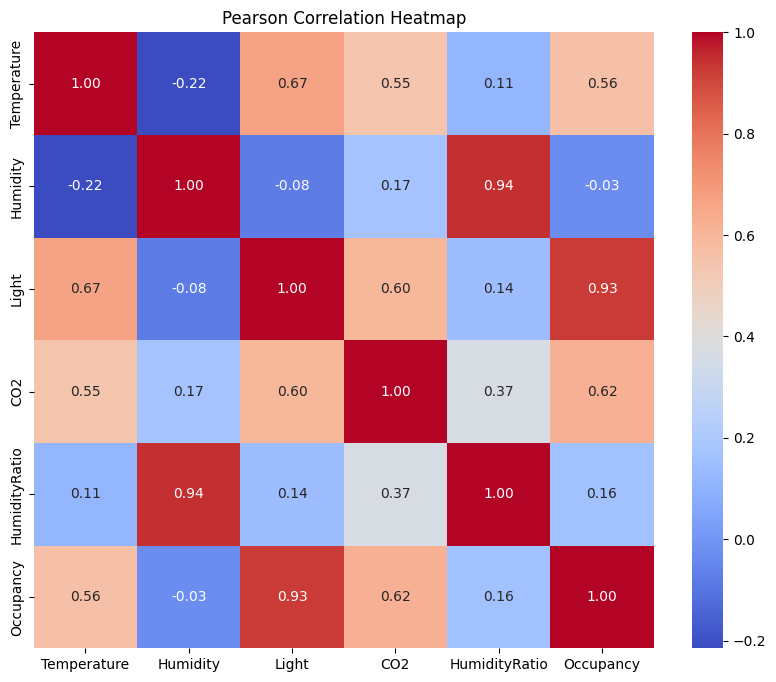

In [20]:
# Compute Pearson correlation matrix
correlation_matrix = df3.corr(method='pearson')

# Display correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

## 2.5 Train Data and Test Data Split

In [24]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df3.drop(columns=['Occupancy'])
y = df3['Occupancy']

# Split into train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
X_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
4950,20.29,19.2225,400.000000,483.50,0.002822
8703,19.50,27.7000,0.000000,444.00,0.003879
3148,21.10,25.1000,0.000000,441.50,0.003881
16329,21.89,29.2000,97.666667,631.25,0.004745
10529,20.10,33.0000,0.000000,446.00,0.004804


## 2.6 Handling Imbalance Data

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
A1: SMOTE Algorithm Explanation
SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance by generating synthetic samples for the minority class. It works by:

Selecting minority class samples.
Finding nearest neighbors for each sample.
Creating synthetic samples along the line between the sample and its neighbors.
Adding these synthetic samples to the dataset to balance class distribution.

A2: Advantage of SMOTE
SMOTE's main advantage over other oversampling methods (like random oversampling) is that it creates synthetic samples instead of duplicating existing ones. This:

Reduces overfitting by avoiding repetitive samples.
Improves model generalization and decision boundaries.


In [26]:
from imblearn.over_sampling import SMOTE
# Split features and target
X = df3.drop(columns=['Occupancy'])
y = df3['Occupancy']


# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts())

# Now you can train your model on the resampled data


Occupancy
1    11824
0    11824
Name: count, dtype: int64


In [27]:
X_train_resampled.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,20.29,19.2225,400.000000,483.50,0.002822
1,19.50,27.7000,0.000000,444.00,0.003879
2,21.10,25.1000,0.000000,441.50,0.003881
3,21.89,29.2000,97.666667,631.25,0.004745
4,20.10,33.0000,0.000000,446.00,0.004804


In [28]:
X_test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
15243,20.033333,35.826667,24.0,518.333333,0.005197
7873,19.200000,31.100000,6.0,431.333333,0.004278
12949,21.000000,24.795000,0.0,575.000000,0.003809
17781,21.500000,28.033333,454.0,1017.000000,0.004446
5987,19.945000,18.700000,0.0,436.000000,0.002687


**DOING CORRELATION ANALYSIS AFTER SPLITING AND BALANCING THE DATA**

In [29]:
# 1) Plot the correlation matrix
# Combine resampled data for correlation calculation
df_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_resampled['Occupancy'] = y_train_resampled

# Compute Pearson correlation matrix
correlation_matrix = df_resampled.corr(method='pearson')

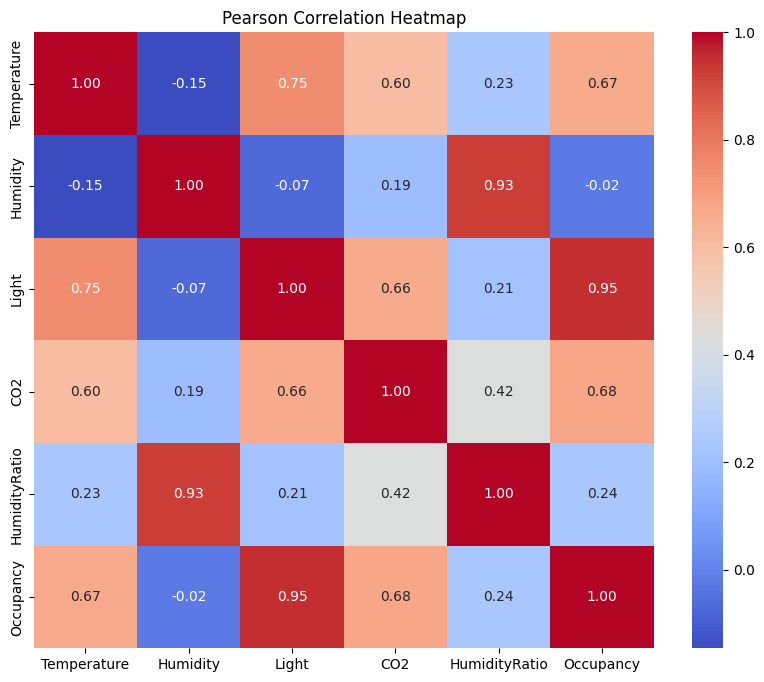

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

*After splitting data and trated the imabalnced data the correlation values increased*

In [31]:
# 2) Remove features that are not correlated with 'Occupancy' (threshold = 0.2)
correlated_features = correlation_matrix['Occupancy'][abs(correlation_matrix['Occupancy']) > 0.2].index.tolist()

# Identify selected and removed features
selected_features = correlated_features
removed_features = [col for col in X_train.columns if col not in selected_features]

print("Selected Features (Correlation > 0.2 with Occupancy):")
print(selected_features)

print("\nRemoved Features (Correlation <= 0.2 with Occupancy):")
print(removed_features)

Selected Features (Correlation > 0.2 with Occupancy):
['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']

Removed Features (Correlation <= 0.2 with Occupancy):
['Humidity']


Since Humidity and HumidityRatio had strong correlation between them. How ever humidity is weakly correlated with target Occupancy. So by removing 'Humidity' feature we can solve both problems.

In [32]:
# Drop 'Humidity' from the dataset
X_train_drop_humidity = X_train_resampled.drop(columns=["Humidity"])
X_test_drop_humidity = X_test.drop(columns=["Humidity"])

print("Updated DataFrame shape:", X_train_resampled.shape)

# Verify remaining features
print("Remaining Features:")
print(X_train_resampled.columns)


Updated DataFrame shape: (23648, 5)
Remaining Features:
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


## 2.7 Scale the Numerical Features

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_drop_humidity)
X_test_scaled = scaler.transform(X_test_drop_humidity)

In [34]:
# Convert the scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_drop_humidity.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_drop_humidity.columns)

# View the first few rows of the scaled training data
print("Scaled X_train data:")
print(X_train_scaled_df.head())

# View the first few rows of the scaled test data
print("\nScaled X_test data:")
print(X_test_scaled_df.head())


Scaled X_train data:
   Temperature     Light       CO2  HumidityRatio
0    -0.884607  0.657077 -0.973070      -2.040791
1    -1.676113 -1.049325 -1.133518      -0.530723
2    -0.073063 -1.049325 -1.143673      -0.528950
3     0.718442 -0.632679 -0.372914       0.705757
4    -1.074969 -1.049325 -1.125394       0.790340

Scaled X_test data:
   Temperature     Light       CO2  HumidityRatio
0    -1.141763 -0.946941 -0.831578       1.352226
1    -1.976684 -1.023729 -1.184970       0.038343
2    -0.173254 -1.049325 -0.601400      -0.630491
3     0.327699  0.887441  1.193991       0.278517
4    -1.230265 -1.049325 -1.166014      -2.234108


# 3.0 Model Implementation

## 3.1 Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Logistic Regression
start_time = time.time()
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train_resampled)
train_time_logistic = time.time() - start_time

y_pred_logistic = logistic_model.predict(X_test_scaled)
y_train_pred_logistic = logistic_model.predict(X_train_scaled)

# Metrics for Logistic Regression
test_accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
train_accuracy_logistic = accuracy_score(y_train_resampled, y_train_pred_logistic)

precision_logistic = precision_score(y_test, y_pred_logistic, average="weighted")
recall_logistic = recall_score(y_test, y_pred_logistic, average="weighted")

test_f1_logistic = f1_score(y_test, y_pred_logistic, average="weighted")
train_f1_logistic = f1_score(y_train_resampled, y_train_pred_logistic, average="weighted")



## 3.2 Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
start_time = time.time()
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train_resampled)
train_time_tree = time.time() - start_time

y_pred_tree = tree.predict(X_test_scaled)
y_train_pred_tree = tree.predict(X_train_scaled)

# Metrics for Decision Tree
test_accuracy_tree = accuracy_score(y_test, y_pred_tree)
train_accuracy_tree = accuracy_score(y_train_resampled, y_train_pred_tree)

precision_tree = precision_score(y_test, y_pred_tree, average="weighted")
recall_tree = recall_score(y_test, y_pred_tree, average="weighted")

test_f1_tree = f1_score(y_test, y_pred_tree, average="weighted")
train_f1_tree = f1_score(y_train_resampled, y_train_pred_tree, average="weighted")

# 4.0 Model Evaluation and Discussion

*Checking Accuracy, Precision, Recall, F1-score of both models both Logistic regression and Decision Trees*

In [37]:
# Display results in a table
import pandas as pd

results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "Training Time (s)"],
    "Logistic Regression": [test_accuracy_logistic, precision_logistic, recall_logistic, test_f1_logistic, train_time_logistic],
    "Decision Tree": [test_accuracy_tree, precision_tree, recall_tree, test_f1_tree, train_time_tree]
})

print(results)

              Metric  Logistic Regression  Decision Tree
0           Accuracy             0.988134       0.990831
1          Precision             0.988614       0.990881
2             Recall             0.988134       0.990831
3           F1-score             0.988236       0.990849
4  Training Time (s)             0.065776       0.106413


***CHECKING OVERFITTING & UNDERFITTING***

In [38]:
# Display Training vs. Test Metrics
results_overfitting_check = pd.DataFrame({
    "Metric": ["Training Accuracy", "Test Accuracy", "Training F1-score", "Test F1-score"],
    "Logistic Regression": [train_accuracy_logistic, test_accuracy_logistic, train_f1_logistic, test_f1_logistic],
    "Decision Tree": [train_accuracy_tree, test_accuracy_tree, train_f1_tree, test_f1_tree]
})

print("Training vs. Test Metrics:")
print(results_overfitting_check)

Training vs. Test Metrics:
              Metric  Logistic Regression  Decision Tree
0  Training Accuracy             0.991669       1.000000
1      Test Accuracy             0.988134       0.990831
2  Training F1-score             0.991669       1.000000
3      Test F1-score             0.988236       0.990849


CONFUSION MATRIX TO CHECK THE ACCURACY

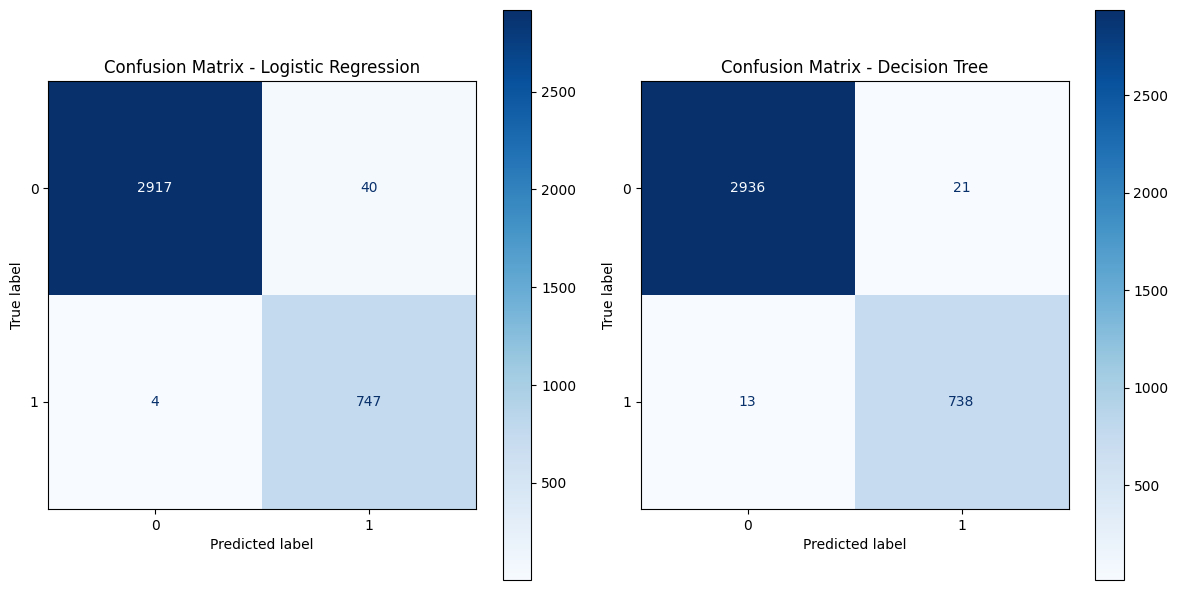

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix for Logistic Regression in the first subplot
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logistic, display_labels=logistic_model.classes_)
disp_logistic.plot(cmap="Blues", values_format='d', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")

# Plot the confusion matrix for Decision Tree in the second subplot
disp_tree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tree, display_labels=tree.classes_)
disp_tree.plot(cmap="Blues", values_format='d', ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree")

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


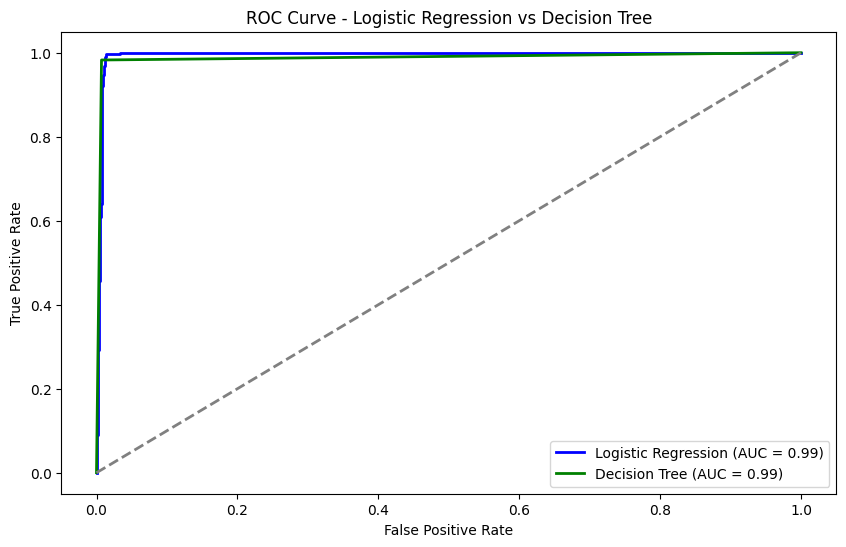

In [40]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Decision Tree ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test_scaled)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC Curves
plt.figure(figsize=(10, 6))

# Plot Logistic Regression ROC curve
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')

# Plot Decision Tree ROC curve
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression vs Decision Tree')
plt.legend(loc="lower right")

# Show the plot
plt.show()


# 5.0 Conclusion

**Performance:** <br>
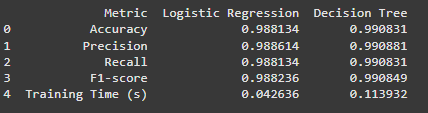



Both models perform excellently on the test set, with the Decision Tree having a slightly higher accuracy and precision. However, the Logistic Regression model has a marginally better recall and F1-score.


**Overfitting and Underfitting:** <br>
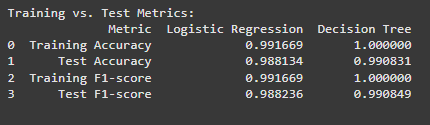


Logistic Regression shows a slight decrease in performance from training to testing, but the difference is minimal, indicating a good balance and no overfitting.
Decision Tree has a perfect training performance (accuracy and F1-score = 1.0), but with a minor drop in test performance, suggesting some overfitting.<br>

**Training Time:** <br>
Logistic Regression trains faster than the Decision Tree by approximately 0.017 seconds, though both models train relatively quickly.<br>

Based on these metrics, Logistic Regression appears to be slightly better in terms of generalization, as its test metrics are closer to its training performance. On the other hand, Decision Tree might require further tuning or pruning to avoid overfitting.

# 6.0 References

Light Luminance:
https://www.glamox.com/en/pbs/human-centric-lighting/in-depth-information/

Treating outliers:
https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

Logistic Regression:
https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Plotting Histogram in Python using Matplotlib:
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

Classification technique:
https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html

Handling Imbalance Data:
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

ROC curve:
https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html